In [2]:
# !pip install statsmodels


C:\Users\adria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\adria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


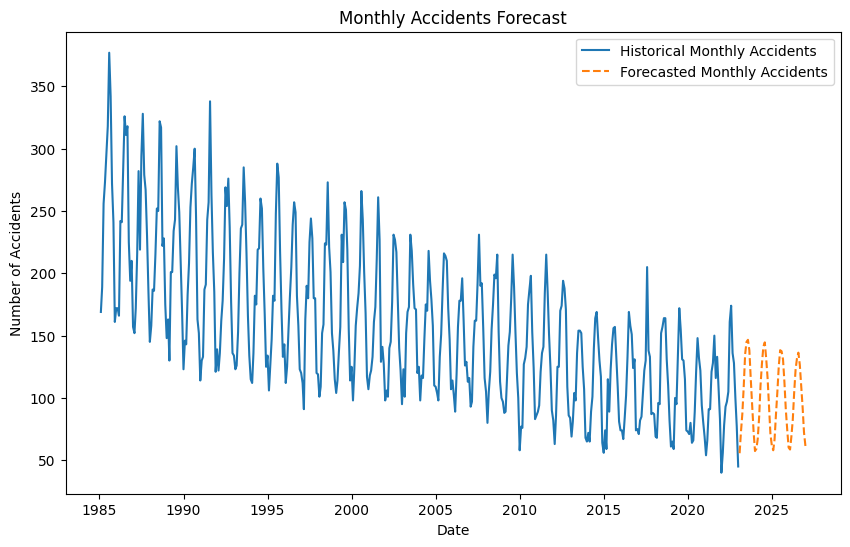

Yearly Table:
     Year  Number of Events
0   1985              3066
1   1986              2845
2   1987              2770
3   1988              2660
4   1989              2495
5   1990              2464
6   1991              2404
7   1992              2293
8   1993              2250
9   1994              2186
10  1995              2214
11  1996              2106
12  1997              2032
13  1998              2068
14  1999              2073
15  2000              2043
16  2001              1901
17  2002              1880
18  2003              1946
19  2004              1792
20  2005              1852
21  2006              1665
22  2007              1837
23  2008              1709
24  2009              1604
25  2010              1559
26  2011              1612
27  2012              1575
28  2013              1313
29  2014              1315
30  2015              1313
31  2016              1342
32  2017              1331
33  2018              1349
34  2019              1303
35  2020     

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

# Wczytanie i przetwarzanie danych
df = pd.read_csv('dane/AviationData.csv', encoding='ISO-8859-1', dtype={6: str, 7: str, 28: str})
df = df[df['Country'] == 'United States']
df = df[df['Event.Date'] >= '1985-01-01']
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df.set_index('Event.Date', inplace=True)

# Grupowanie danych po miesiącach i liczba wypadków
monthly_accidents = df.resample('M').size()

# Tworzenie modelu ARIMA
order = (7,2,7) 
model = ARIMA(monthly_accidents, order=order)
results = model.fit()

# Prognozowanie
start_date = monthly_accidents.index[-1] + timedelta(days=1)
forecast = results.get_forecast(steps=48).predicted_mean  # na przykład, prognozowanie na 4 lata do przodu (48 miesięcy)

# Rysowanie wykresu
plt.figure(figsize=(10,6))
plt.plot(monthly_accidents.index, monthly_accidents, label='Historical Monthly Accidents')
plt.plot(forecast.index, forecast, label='Forecasted Monthly Accidents', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.title('Monthly Accidents Forecast')
plt.legend()
plt.show()

# Tworzenie tabeli dla historycznej liczby wypadków rocznie
yearly_table = monthly_accidents.resample('Y').sum().reset_index()
yearly_table.columns = ['Year', 'Number of Events']
yearly_table['Year'] = yearly_table['Year'].dt.year  # Zmiana formatu roku na liczbę całkowitą

# Tworzenie tabeli dla prognozowanej liczby wypadków miesięcznie
forecast_table = forecast.reset_index()
forecast_table.columns = ['Date', 'Number of Events']
forecast_table['Year'] = forecast_table['Date'].dt.year
forecast_table['Month'] = forecast_table['Date'].dt.month

# Wyświetlenie tabel
print("Yearly Table:\n", yearly_table)
print("Forecast Table:\n", forecast_table)


In [6]:
# # Eksportowanie tabel do Excela
# with pd.ExcelWriter('dane_prognozy.xlsx') as writer:
#     yearly_table.to_excel(writer, sheet_name='Yearly Data', index=False)
#     forecast_table.to_excel(writer, sheet_name='Forecast Data', index=False)

# print("Tabele zostały wyeksportowane do dane_prognozy.xlsx")

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Optymalizacja Parametrów
p,d,q,P,D,Q,s = 1,1,1,1,1,1,12  # przykładowe wartości - użyj kryterium informacyjne Akaike (AIC) lub innego metody do optymalizacji parametrów

# Stworzenie modelu SARIMA
model = SARIMAX(monthly_accidents, order=(p,d,q), seasonal_order=(P,D,Q,s))
results = model.fit()

# Prognozowanie
forecast = results.get_forecast(steps=48).predicted_mean
print(forecast)


2023-01-31     55.962166
2023-02-28     62.737064
2023-03-31     82.519143
2023-04-30     85.377540
2023-05-31    114.441684
2023-06-30    139.098753
2023-07-31    155.216774
2023-08-31    131.620897
2023-09-30    122.237604
2023-10-31     97.969936
2023-11-30     71.103604
2023-12-31     53.630151
2024-01-31     54.372991
2024-02-29     62.245246
2024-03-31     81.472763
2024-04-30     84.454695
2024-05-31    111.209644
2024-06-30    139.302606
2024-07-31    155.078822
2024-08-31    129.903925
2024-09-30    120.672273
2024-10-31     95.995456
2024-11-30     69.552962
2024-12-31     50.487069
2025-01-31     52.350179
2025-02-28     60.102140
2025-03-31     79.390449
2025-04-30     82.358839
2025-05-31    109.366928
2025-06-30    137.083238
2025-07-31    152.896923
2025-08-31    127.895123
2025-09-30    118.646848
2025-10-31     94.014883
2025-11-30     67.525926
2025-12-31     48.634601
2026-01-31     50.374904
2026-02-28     58.140052
2026-03-31     77.421697
2026-04-30     80.391571


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from openpyxl import Workbook
from openpyxl.styles import PatternFill

# Tworzenie DataFrame dla prognozowanych danych
forecast_df = forecast_arimax.reset_index()
forecast_df.columns = ['Date', 'Forecasted Number of Fatal Injuries']
forecast_df['Year'] = forecast_df['Date'].dt.year

# Grupowanie prognozowanych danych po roku
forecast_yearly = forecast_df.groupby('Year')['Forecasted Number of Fatal Injuries'].sum().reset_index()

# Tworzenie DataFrame dla danych historycznych
historical_df = endog_var.reset_index()
historical_df.columns = ['Date', 'Historical Number of Fatal Injuries']
historical_df['Year'] = historical_df['Date'].dt.year

# Grupowanie historycznych danych po roku
historical_yearly = historical_df.groupby('Year')['Historical Number of Fatal Injuries'].sum().reset_index()

# Łączenie historycznych i prognozowanych danych
final_df = pd.merge(historical_yearly, forecast_yearly, how='outer', on='Year')

# Eksportowanie do Excela
filename = 'dane_forecastu.xlsx'
final_df.to_excel(filename, index=False)

# Otwarcie pliku Excela i formatowanie kolorów
book = Workbook()
book.save(filename)
writer = pd.ExcelWriter(filename, engine='openpyxl') 
writer.book = book

# Ustawienie kolorów
forecast_fill = PatternFill(start_color='FFFF00', end_color='FFFF00', fill_type='solid')
historical_fill = PatternFill(start_color='00FF00', end_color='00FF00', fill_type='solid')

# Zapisanie i formatowanie danych
final_df.to_excel(writer, index=False, sheet_name='Forecast Data')
sheet = writer.sheets['Forecast Data']

# Iterowanie przez komórki i zmiana koloru tła
for row in sheet.iter_rows(min_row=2, max_col=3, max_row=sheet.max_row):
    for cell in row:
        if 'Forecasted' in cell.column_letter:
            cell.fill = forecast_fill
        elif 'Historical' in cell.column_letter:
            cell.fill = historical_fill

writer.save()


C:\Users\adria\AppData\Local\Temp\ipykernel_16008\1105756222.py:34: FutureWarning: Setting the `book` attribute is not part of the public API, usage can give unexpected or corrupted results and will be removed in a future version
  writer.book = book
C:\Users\adria\AppData\Local\Temp\ipykernel_16008\1105756222.py:52: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


<Figure size 1000x600 with 0 Axes>

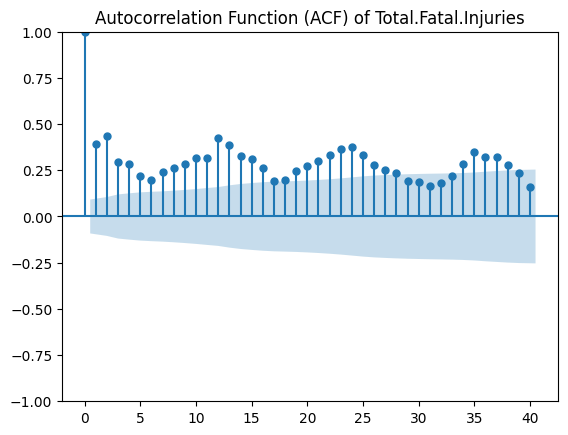

<Figure size 1000x600 with 0 Axes>

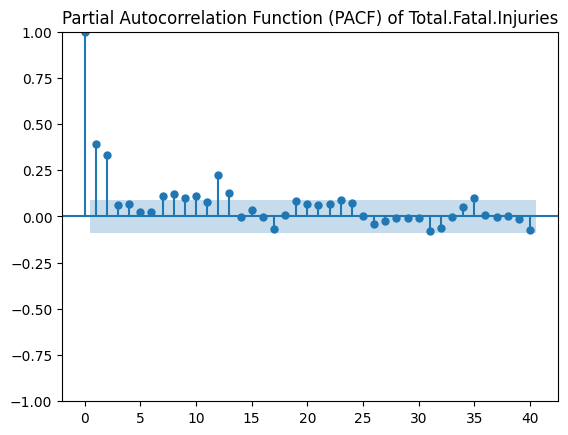

ADF Statistic: -2.27659323326453
p-value: 0.1796282710648925
Nie możemy odrzucić hipotezy zerowej, szereg czasowy jest prawdopodobnie niestacjonarny.


In [44]:
# dobór parametrów

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Wybieranie zmiennej, którą chcemy przewidzieć
endog_var = monthly_data['Total.Fatal.Injuries']

# Rysowanie wykresu ACF
plt.figure(figsize=(10,6))
plot_acf(endog_var, lags=40)
plt.title('Autocorrelation Function (ACF) of Total.Fatal.Injuries')
plt.show()

# Rysowanie wykresu PACF
plt.figure(figsize=(10,6))
plot_pacf(endog_var, lags=40)
plt.title('Partial Autocorrelation Function (PACF) of Total.Fatal.Injuries')
plt.show()

# Przeprowadzanie testu Augmented Dickey-Fuller
adf_result = adfuller(endog_var)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

if adf_result[1] <= 0.05:
    print("Odrzucamy hipotezę zerową, szereg czasowy jest stacjonarny.")
else:
    print("Nie możemy odrzucić hipotezy zerowej, szereg czasowy jest prawdopodobnie niestacjonarny.")


In [20]:
# Różnicowanie szeregu czasowego i ponowne przeprowadzenie testu ADF
endog_var_diff = endog_var.diff().dropna()
adf_result_diff = adfuller(endog_var_diff)
print(f'ADF Statistic after differencing: {adf_result_diff[0]}')
print(f'p-value after differencing: {adf_result_diff[1]}')

# Określanie wartości p i q na podstawie ACF i PACF
p = 1 # liczba opóźnień, na których PACF jest znacząca
q = 1 # liczba opóźnień, na których ACF jest znacząca
d = 1 # wartość różnicowania na podstawie testu ADF i ewentualnego dodatkowego różnicowania

# Ustawienie parametrów modelu ARIMAX i dopasowanie modelu
model_arimax = ARIMA(endog=endog_var, exog=exog_vars, order=(p,d,q))
results_arimax = model_arimax.fit()


ADF Statistic after differencing: -8.537106069648928
p-value after differencing: 1.0011000654801972e-13
